In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

In [2]:
## Loading Data function 
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing['ocean_proximity'].nunique()

5

In [8]:
import matplotlib.pyplot as plt

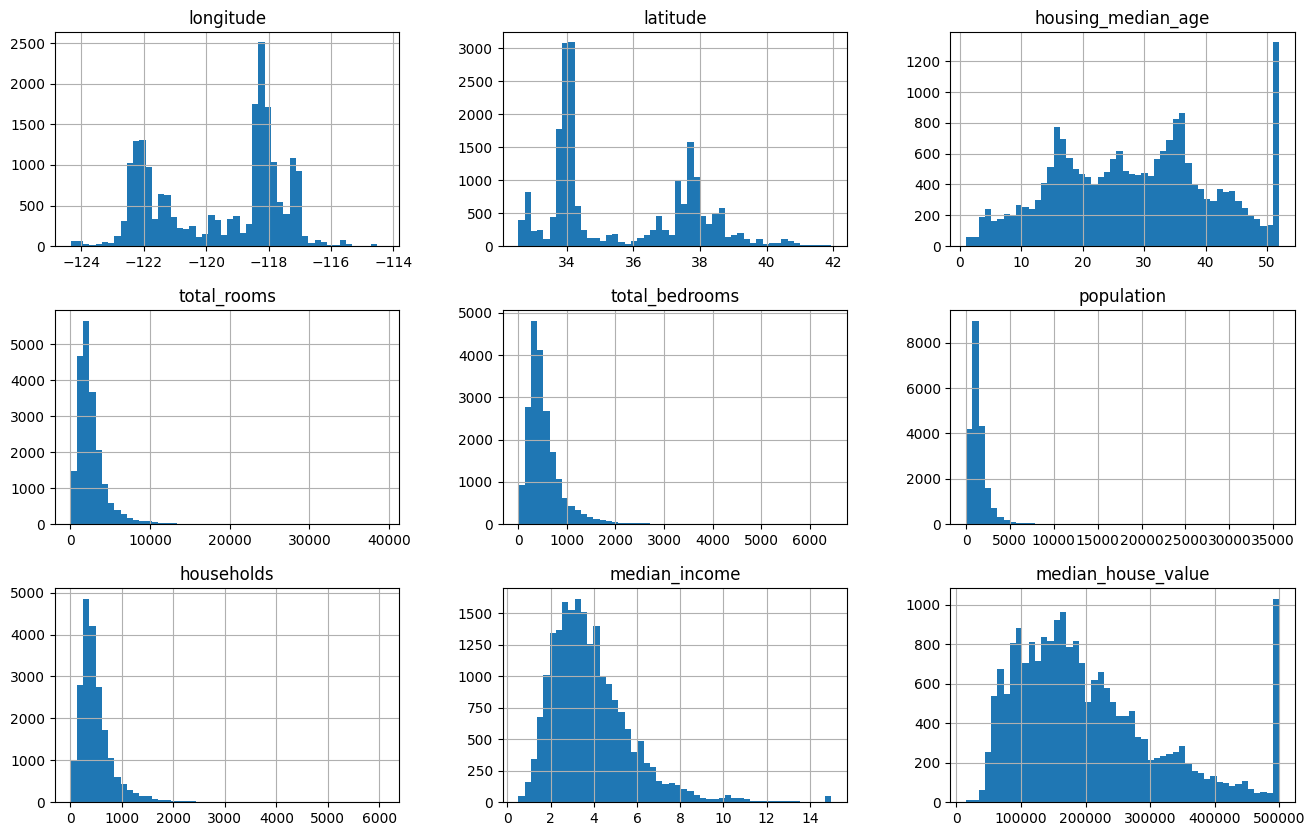

In [9]:
housing.hist(bins=50, figsize=(16,10))
plt.show()

In [10]:
## Put test data aside before looking deeper into data 
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=100)

In [12]:
## Putting median income as a categorical feature
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1,2,3,4,5])

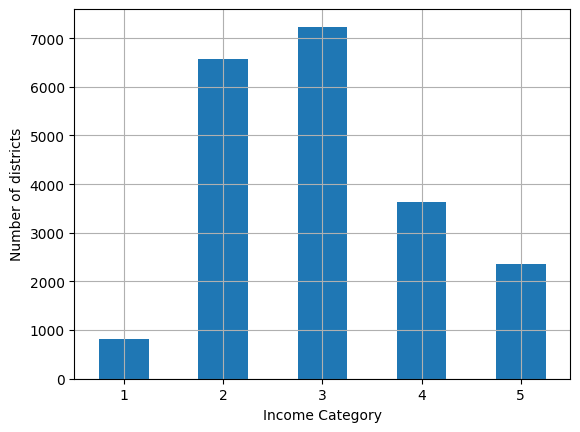

In [13]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [15]:
strat_train_set, strat_test_set = strat_splits[0]

In [16]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=100)

In [18]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14946,-122.13,37.77,24.0,2459.0,317.0,916.0,324.0,7.0712,293000.0,NEAR BAY
13939,-118.48,34.33,9.0,2384.0,395.0,1697.0,402.0,6.0891,270100.0,<1H OCEAN
3635,-120.73,39.63,17.0,1791.0,356.0,432.0,190.0,3.8826,92400.0,INLAND
6839,-122.43,37.79,24.0,2459.0,1001.0,1362.0,957.0,2.6782,450000.0,NEAR BAY
8725,-118.37,33.95,35.0,924.0,349.0,1376.0,358.0,2.2297,262500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
14726,-122.46,37.69,26.0,4302.0,1125.0,3320.0,1100.0,3.4375,277700.0,NEAR OCEAN
15519,-117.09,32.65,25.0,3509.0,985.0,2359.0,899.0,2.6296,150000.0,NEAR OCEAN
1595,-117.57,33.93,3.0,1240.0,151.0,519.0,146.0,7.5408,271900.0,INLAND
15680,-122.53,37.97,52.0,205.0,119.0,228.0,132.0,1.9063,200000.0,NEAR BAY


In [22]:
## Test data aside and look only at training data

housing = strat_train_set.copy()

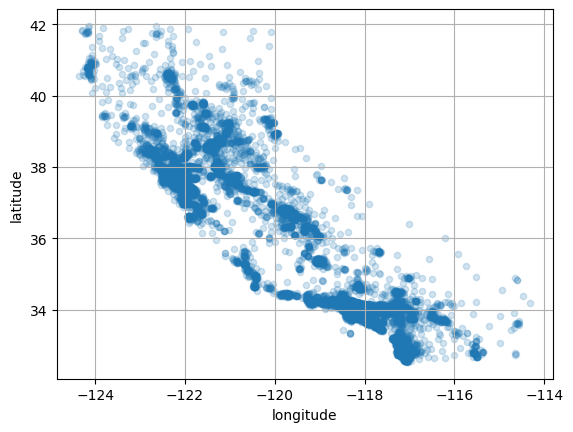

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

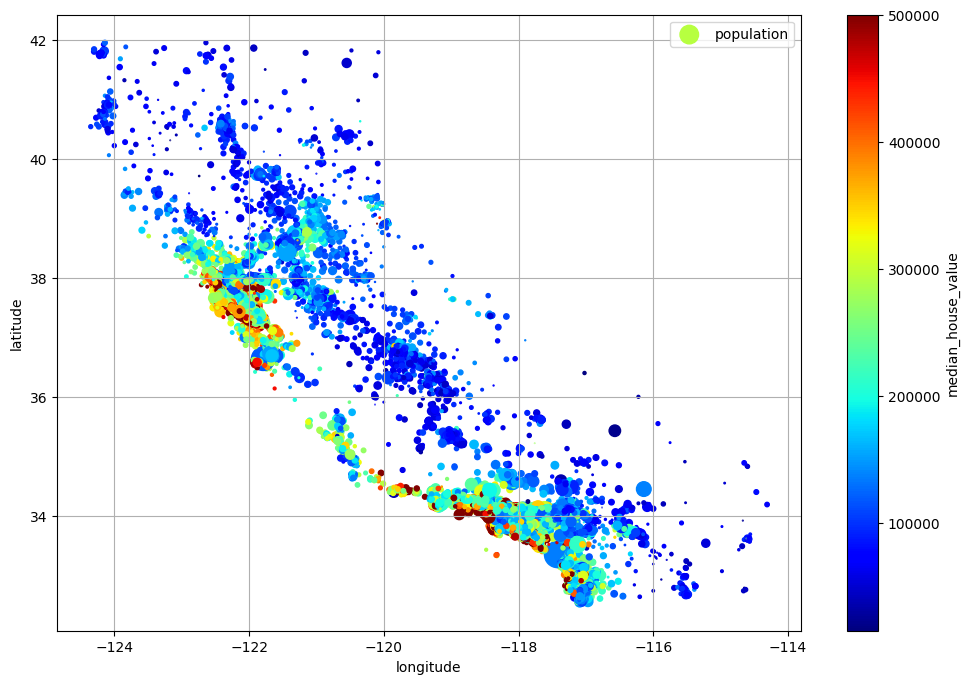

In [25]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True,
            s=housing['population'] / 100, label='population', 
            c='median_house_value', cmap='jet', colorbar=True, 
            legend=True, sharex=False, figsize=(12,8))
plt.show()

In [29]:
corr_matrix = housing.corr(numeric_only=True)

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.683718
total_rooms           0.132973
housing_median_age    0.105833
households            0.066960
total_bedrooms        0.050406
population           -0.023505
longitude            -0.045570
latitude             -0.144629
Name: median_house_value, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

In [32]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

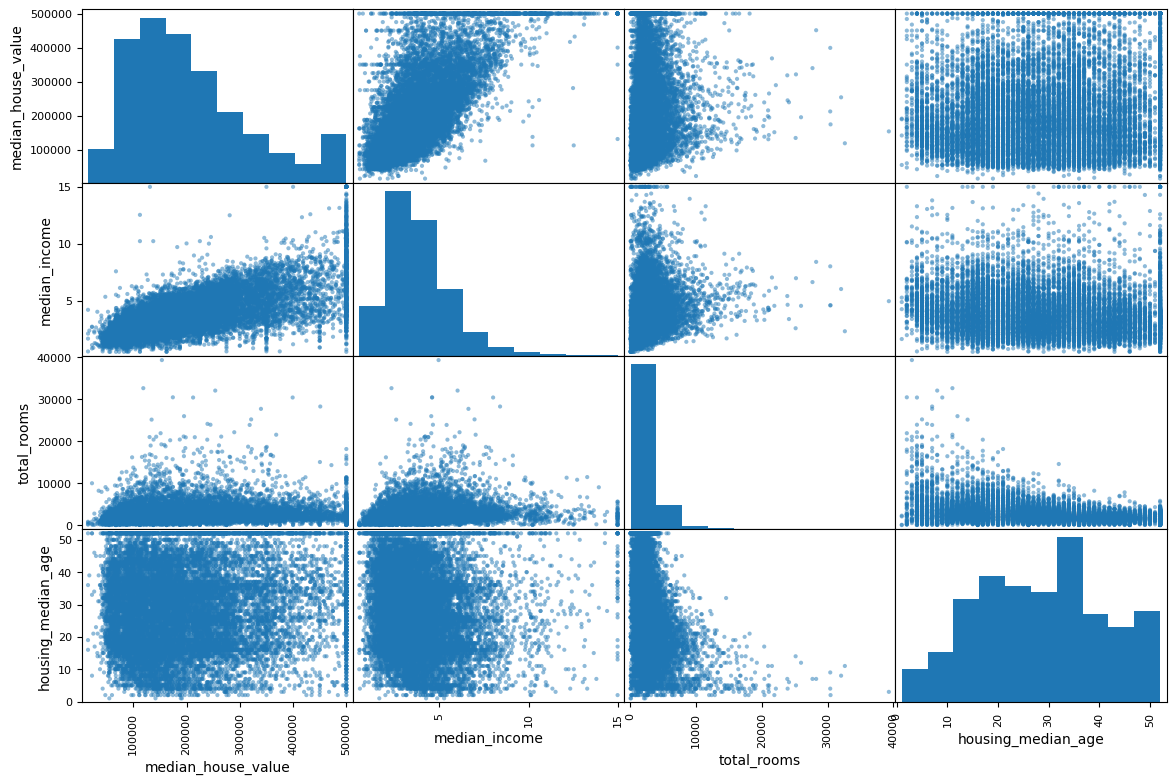

In [34]:
scatter_matrix(housing[attributes], figsize=(14,9))
plt.show()